# Projeto Titanic
- <a href="#instalacao">Instalação dos pacotes</a>
- <a href="#visao-geral">Visão geral do projeto</a>
- <a href="#analisando-dados">Analisando e entendendo os dados</a>
- <a href="#algoritmo">Implementando o primeiro algoritmo de Machine Learning</a>
- <a href="#resultados">Gerando e submetendo os resultados</a>
- <a href="#validacao">Validações do modelo</a>

## Instalação <a name='instalacao' />


### Python:

In [1]:
import sys
print(sys.version)

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


### Numpy:

In [2]:
import numpy
print(numpy.version.version)

1.11.3


### Pandas:

In [3]:
import pandas
print(pandas.__version__)

0.19.2


### Matplotlib:

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

print(mpl.__version__)
print(pylab.__version__)
print(sns.__version__)

2.0.0
1.11.3
0.7.1


### Scikit-learn:

In [5]:
import sklearn
print(sklearn.__version__)

0.18.1


### XG Boost:
*** Como instalar o XG Boost: http://xgboost.readthedocs.io/en/latest/build.html ***

In [6]:
import xgboost
print(xgboost.__version__)

0.6


## Visão geral do projeto <a name='visao-geral' />

> O naufrágio do RMS Titanic é um dos naufrágios mais infames da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulação. Esta sensacional tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

> Uma das razões que o naufrágio levou a tal perda de vida era que não havia bastantes barcos salva-vidas para os passageiros e tripulação. Embora houvesse algum elemento de sorte envolvido em sobreviver ao afundamento, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

> Neste desafio, pedimos que você complete a análise de quais tipos de pessoas poderiam sobreviver. Em particular, pedimos que você aplique as ferramentas de aprendizado de máquina para prever quais passageiros sobreviveram à tragédia.

Os dados deste projeto podem ser vistos no Kaggle <a href="https://www.kaggle.com/c/titanic">aqui</a> e já estão disponíveis na pasta "data\titanic\"

**Neste primeiro momento o nosso foco é entender todo o ciclo que é utilizado quando é abordado um problema que será resolvido através de Machine Learning. Não se preocupe em memorizar os comandos ou qualquer coisa relacionada ao código. Vamos focar no processo!**

## Analisando e entendendo os dados<a name='analisando-dados' />

### Carregando os dados

In [7]:
import pandas as pd

# Carregando os dados de treinamento e de testes
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [8]:
# Vamos agora visualizar alguns itens de treinamento
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Vamos agora visualizar alguns itens da base de teste
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Entendendo as características (Features)

Antes de mais nada, precisamos entender o que significa cada coluna para que possamos extrair o máximo de informações possíveis e gerar outras informações que permitam trazer uma acertividade maior dos nossos algoritmos.

> **PassengerID**: Um identificador unico do passageiro no banco de dados.

> **Survived**: Esta coluna está apenas na base de treinamento e diz se o passageiro sobreviveu ou não.

> **Pclass**: Qual a classe o passageiro está (1 primeira classe, 2 segunda classe e 3 terceira classe)

> **Sex**: Sexo do passageiro

> **SibSp**: Número de irmãos ou esposas no barco

> **Parch**: Número de pais ou filhos dentro do barco

> **Ticket**: Numero do Ticket

>**Fare**: Tarifa paga pelo passageiro

>**Cabin**: Número da cabine

>**Embarked**: Porto onde o passageiro embarcou

### Gerando alguns graficos e entendendo algumas caracteristicas

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

Porcentagem de sobrevivencia: 0.3838383838383838


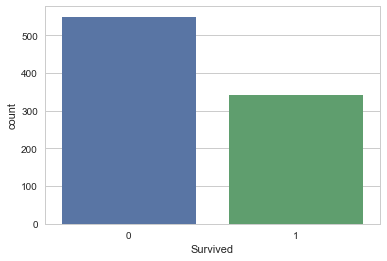

In [11]:
# Vamos descobrir a distribuição dos que sobreviveram (1) e os que morreram (0)
print('Porcentagem de sobrevivencia:', len(train_df[train_df.Survived == 1]) / len(train_df))

sns.countplot(x="Survived", data=train_df)

1 class: 136


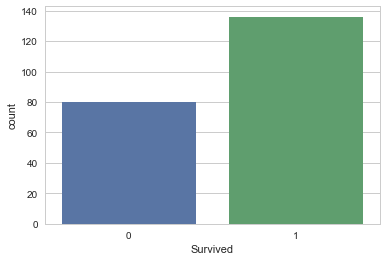

In [12]:
# Qual a porcentagem de sobrevivencia das pessoas que estavam na primeira classe?
survived_1class = len(train_df[ (train_df.Survived == 1) & (train_df.Pclass == 1) ])
print("1 class:", survived_1class)

sns.countplot(x="Survived", data=train_df[train_df.Pclass == 1])

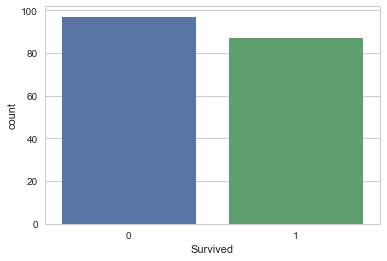

In [13]:
# Qual a porcentagem de sobrevivencia das pessoas que estavam na segunda classe?
sns.countplot(x="Survived", data=train_df[train_df.Pclass == 2])

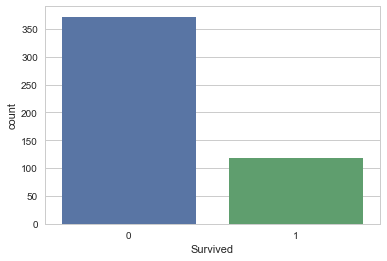

In [14]:
# Qual a porcentagem de sobrevivencia das pessoas que estavam na terceira classe?
sns.countplot(x="Survived", data=train_df[train_df.Pclass == 3])

female not survived:  3
female survived:  91


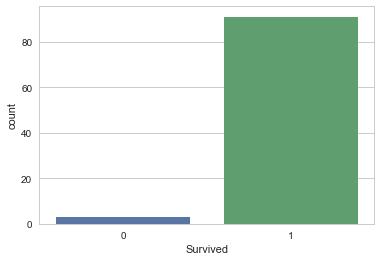

In [15]:
# As mulheres da primeira classe tiveram realmente um alto indice de sobrevivencia?
sns.countplot(x="Survived", data=train_df[(train_df.Pclass == 1) & (train_df.Sex == 'female')])
    
print("female not survived: ", len(train_df[(train_df.Survived == 0) & 
                                            (train_df.Pclass == 1) & 
                                            (train_df.Sex == 'female')]))

print("female survived: ", len(train_df[(train_df.Survived == 1) & 
                                        (train_df.Pclass == 1) & 
                                        (train_df.Sex == 'female')]))


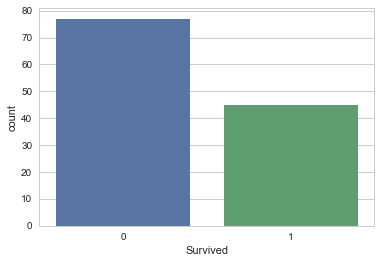

In [16]:
# homens da 1, 2 e 3 classe
sns.countplot(x="Survived", data=train_df[(train_df.Pclass == 1) & (train_df.Sex == 'male')])

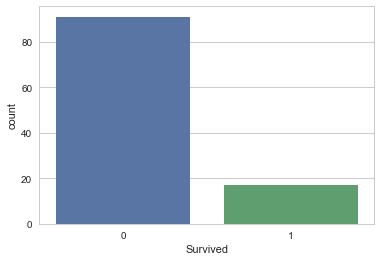

In [17]:
sns.countplot(x="Survived", data=train_df[(train_df.Pclass == 2) & (train_df.Sex == 'male')])

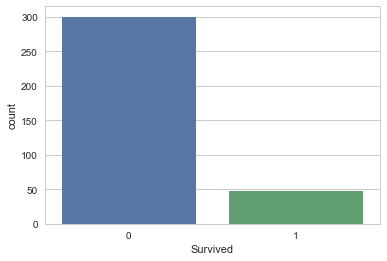

In [18]:
sns.countplot(x="Survived", data=train_df[(train_df.Pclass == 3) & (train_df.Sex == 'male')])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


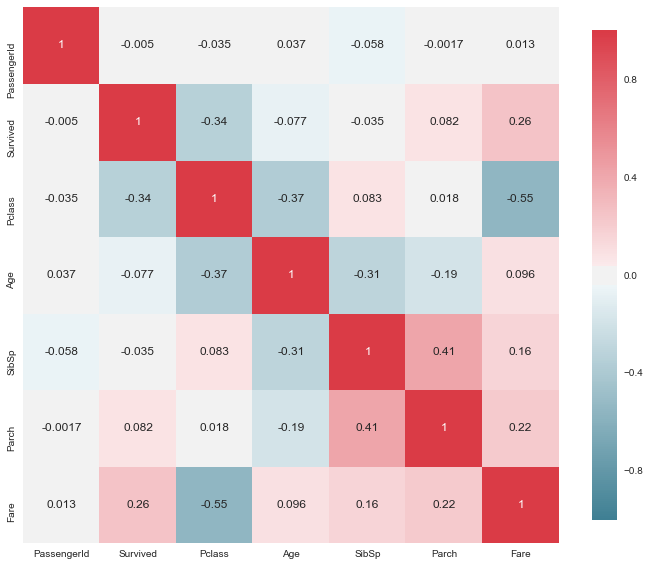

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

def plot_correlation_map( df ):
    corr = train_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(train_df)

### Embarques

Foram três portos de embarque dos passageiros:

Q = Queenstown (terceiro porto)
C = Cherbourg (segundo porto)
S = Southampton (primeiro porto de embarque, mais longe)

Fonte: https://pt.wikipedia.org/wiki/RMS_Titanic#/media/File:TitanicRoute.svg

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


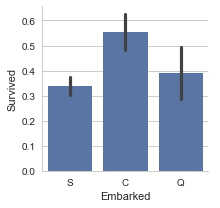

In [20]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
plot_categories( train_df , cat = 'Embarked', target = 'Survived'  )


In [21]:
# Por que sera que algumas das mulheres da primeira classe morreram?
train_df[(train_df.Sex == 'female') & (train_df.Survived == 0) & (train_df.Pclass == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [22]:
train_df[train_df.Ticket == '113781'].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S


## Entendendo os NaNs

É muito comum nas bases de dados existirem informações faltando, os NaN o que fazer com esta informação depende da base de dados que você está trabalhando. Sempre podemos ignorar ou preencher com as informações que estão faltando.

In [23]:
# O que sao os NaNs? Quais campos possuem esta informacao?
for field in train_df.columns:
    print(field, 'NaN:', train_df[field].isnull().sum())

PassengerId NaN: 0
Survived NaN: 0
Pclass NaN: 0
Name NaN: 0
Sex NaN: 0
Age NaN: 177
SibSp NaN: 0
Parch NaN: 0
Ticket NaN: 0
Fare NaN: 0
Cabin NaN: 687
Embarked NaN: 2


In [24]:
for field in test_df.columns:
    print(field, 'NaN:', test_df[field].isnull().sum())

PassengerId NaN: 0
Pclass NaN: 0
Name NaN: 0
Sex NaN: 0
Age NaN: 86
SibSp NaN: 0
Parch NaN: 0
Ticket NaN: 0
Fare NaN: 1
Cabin NaN: 327
Embarked NaN: 0


### O que faremos com os NaNs do campo Embarked?

O local de embarque, tem apenas 2 pessoas sem preencher, esta informação definitivamente é irrelevante neste momento e acredito que pode ser deixada de lado.

In [25]:
# Vamos colocar o local de embarque como 0 nos campos que estiverem NaN
for dataset in [train_df, test_df]:
    dataset.loc[dataset['Embarked'].isnull(), 'Embarked'] = 0

In [26]:
train_df['Embarked'].isnull().head(5)

0    False
1    False
2    False
3    False
4    False
Name: Embarked, dtype: bool

### O que faremos com os NaNs do campo Cabin?

No caso do NaN, o numero da cabine é o que mais está faltando. Será que isso é realmente necessário neste momento? Não sei... podemos ignorar este campo.

Um ponto interessante que podemos fazer é tentar cruzar as informações de cabine com o Ticket... se o Ticket for igual, a gente pode usar a mesma cabine dos outros que estiverem com o mesmo Ticket mas com a cabine preenchida...

In [27]:
for ticket in train_df.loc[train_df['Cabin'].isnull()]['Ticket'].unique():
    print(ticket, len(train_df[train_df.Ticket == ticket]))

A/5 21171 1
STON/O2. 3101282 1
373450 1
330877 1
349909 4
347742 3
237736 2
A/5. 2151 1
347082 7
350406 1
248706 1
382652 5
244373 1
345763 1
2649 1
239865 2
330923 1
347077 4
2631 1
330959 1
349216 1
PC 17601 1
335677 1
C.A. 24579 1
PC 17604 2
113789 2
2677 1
A./5. 2152 1
345764 2
2651 2
7546 1
11668 2
349253 1
SC/Paris 2123 3
330958 1
S.C./A.4. 23567 1
370371 1
14311 1
2662 1
349237 2
3101295 6
A/4. 39886 1
2926 1
C.A. 31026 1
2697 1
C.A. 34651 3
CA 2144 6
2669 1
347088 6
PC 17605 1
2661 2
S.P. 3464 1
3101281 1
315151 1
C.A. 33111 1
S.O.C. 14879 5
2680 1
1601 7
349208 1
374746 1
248738 2
364516 2
345767 1
345779 1
330932 1
113059 1
SO/C 14885 1
3101278 2
W./C. 6608 4
SOTON/OQ 392086 1
343275 1
343276 1
347466 1
C.A. 2315 2
364500 1
374910 1
231919 2
244367 2
349245 1
349215 1
7540 1
3101276 1
349207 1
343120 1
312991 1
349249 1
371110 3
2665 2
324669 1
4136 1
2627 2
STON/O 2. 3101294 1
370369 1
A4. 54510 1
370372 1
C 17369 1
347061 1
349241 1
SOTON/O.Q. 3101307 1
A/5. 3337 1
228414 1

In [28]:
train_df[train_df.Ticket == 'S.O.C. 14879']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,NaN,S


Ok, vemos que os NaN da cabine não ajudam muito e como visualizamos acima, podemos usar o Ticket que acaba identificando um grupo de pessoas da mesma forma. Então podemos ignorar estes dados logo.

In [29]:
# Remove a coluna Cabin da base de dados
train_df = train_df.drop(['Cabin'], axis=1)
# Ops, temos que fazer isso tambem na base de testes... 
test_df = test_df.drop(['Cabin'], axis=1)

In [30]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [31]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


### O que faremos com os NaNs do campo Age?

A idade talvez seja interessante afinal nesta tragédia, a idade era um fator bem importante na hora de escolher quem subir ou não no bote.

Mas como podemos fazer para saber a idade de quem não preencheu? Podemos tentar "adivinhar" esta informação?

In [32]:
train_df.loc[train_df['Age'].isnull()][(train_df['SibSp'] > 0) & (train_df['Parch'] > 0)].head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S


In [33]:
# Antes de mais nada, precisamos converter o male e female para 0 ou 1 para facilitar o nosso proximo codigo
# EXERCÍCIO: Experimente não rodar este codigo e já rodar o próximo pra ver o erro que vai dar e tente entender
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S


In [34]:
import numpy as np
guess_ages = np.zeros((2,3))

for dataset in [train_df, test_df]:
    for sex in range(0, 2):
        for pclass in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == sex) & (dataset['Pclass'] == pclass + 1)]['Age'].dropna()

            age_guess = guess_df.median()
            print('Sex', sex, 'pclass', pclass)
            print(len(guess_df), age_guess)

            # Converte para a idade mais proxima (para nao ficar 0.4 ou 0.333)
            guess_ages[sex, pclass] = int( age_guess / 0.5 + 0.5 ) * 0.5

    for sex in range(0, 2):
        for pclass in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == sex) & (dataset.Pclass == pclass + 1), 'Age'] = guess_ages[sex,pclass]

    dataset['Age'] = dataset['Age'].astype(int)

Sex 0 pclass 0
101 40.0
Sex 0 pclass 1
99 30.0
Sex 0 pclass 2
253 25.0
Sex 1 pclass 0
85 35.0
Sex 1 pclass 1
74 28.0
Sex 1 pclass 2
102 21.5
Sex 0 pclass 0
50 42.0
Sex 0 pclass 1
59 28.0
Sex 0 pclass 2
96 24.0
Sex 1 pclass 0
48 41.0
Sex 1 pclass 1
29 24.0
Sex 1 pclass 2
50 22.0


In [35]:
print('train_df:', len(train_df.loc[train_df['Age'].isnull()]))
print('test_df:', len(test_df.loc[train_df['Age'].isnull()]))

train_df: 0
test_df: 0


## O que faremos com os NaNs do campo Fare na base de testes?

Já notamos que o campo Fare tem 1 item que está com 1 item que está com NaN, nada demais mas vai dar problemas no futuro... vamos resolver.

In [36]:
test_df.loc[test_df['Fare'].isnull()] = 0
train_df.loc[train_df['Fare'].isnull()] = 0

## Extraindo novas features

## Extraindo informacoes a partir do nome do passageiro

Algumas informações podem ser interessantes de serem extraidas a partir do nome do passageiro. Exemplo:
- O passageiro é casado?
- Ele é doutor ou algo do tipo?
- Ele pode até mesmo ser o capitão do navio!

Estas informações, podem facilitar o trabalho do nosso modelo ao classificar um determinado usuário.

In [37]:
# Vamos extrair as informacoes do nome do passageiro e inserir na coluna Title
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

# O comando crosstab correlaciona o titulo (linhas) com o sexo (colunas) e traz o numero de passageiros de acordo com o titulo
pd.crosstab(train_df['Title'], train_df['Sex'])

<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<ipython-input-37-568e43584802>:3: DeprecationWarning: invalid escape sequence \.
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/Data

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


Para simplificar os nossos dados, vamos reduzir alguns titulos comuns e repetidos para apenas 5 categorias, isso simplifica muito na hora do nosso algoritmo identificar quem é quem

In [38]:
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,Miss


Vamos transformar o titulo em numero para que o modelo possa analisar e treinar a partir dos dados

In [39]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Veja que o Title agora esta com valores numericos
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,2


### O passageiro está sozinho no navio?

Esta é uma característica importante, pois algumas pessoas deixaram de subir nos botes salva vidas para ir buscar algum parente dentro do Navio e acabaram não sobrevivendo.

In [40]:
# Vamos pegar o tamanho da familia que a pessoa está
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Agora criamos uma nova feature chamada IsAlone indicando se o passageiro esta sozinho
train_df['IsAlone'] = 0
test_df['IsAlone'] = 0

# Rodos os casos em que o tamanho da familia for igual a 1, vamos considerar que ele esta sozinho
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

## Categorizando as taxas pagas pelo passageiro

Os algoritmos de Machine Learning podem se dar melhor com campos que possuem poucos valores do que campos que possuem milhares de informações diferentes, então categorizar as taxas pagas colocando este valor em uma categoria pode ser interessante e existem algumas formas de fazer isso.

In [41]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [42]:
for dataset in [train_df, test_df]:
    dataset['FareCat'] = 0
    dataset.loc[dataset.Fare < 7.91, 'FareCat'] = 1
    dataset.loc[(dataset.Fare >= 7.91) & (dataset.Fare <= 14.45), 'FareCat'] = 2
    dataset.loc[(dataset.Fare >= 14.45) & (dataset.Fare <= 31), 'FareCat'] = 3
    dataset.loc[dataset.Fare > 31, 'FareCat'] = 4

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,3,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,2,1,1,2


## Transformando 'Embarked' em número

In [43]:
# Vamos ver quais os valores temos
train_df['Embarked'].unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [44]:
# Vamos mapear como fizemos com os titulos
embarked_mapping = {"S": 1, "C": 2, "Q": 3, 0: 0}
for dataset in [train_df, test_df]:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,1,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,2,3,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,1,2,1,1,2


## Finalizando os dados

Agora é o momento que terminamos nossa análise e vamos preparar os dados para montar os modelos. Alguns pontos são importantes antes de continuarmos.

* Os campos não podem ter valores alphanumericos, então vamos rancar campos como o nome do passageiro
* PassengerID por exemplo é um valor que é inútil nesta base de dados, então vamos eliminar também

In [45]:
train_df = train_df.drop(['Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,0,22,1,0,7.2500,1,1,2,0,1
1,2,1,1,1,38,1,0,71.2833,2,3,2,0,4
2,3,1,3,1,26,0,0,7.9250,1,2,1,1,2


In [46]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,892,3,0,34,0,0,7.8292,3,1.0,1,1,1
1,893,3,1,47,1,0,7.0000,1,3.0,2,0,1
2,894,2,0,62,0,0,9.6875,3,1.0,1,1,2


## Implementando o primeiro algoritmo de Machine Learning <a name='algoritmo' />

### Treinamento do algoritmo

Antes de mais nada, vamos carregar os dados corretamente para o treinamento. Basicamente as informações são carregadas em 3 locais:

* X_train: Base de treinamento com todas as informações mas sem o target que é se o passageiro sobreviveu ou não
* Y_train: O target que diz se o passageiro sobreviveu ou não (nesta base)
* X_test: Base de testes que é usada para verificar se o algoritmo está acertando ou não

In [47]:
X_train = train_df.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [48]:
for field in test_df.columns:
    print(field, 'NaN:', test_df[field].isnull().sum())

PassengerId NaN: 0
Pclass NaN: 0
Sex NaN: 0
Age NaN: 0
SibSp NaN: 0
Parch NaN: 0
Fare NaN: 0
Embarked NaN: 0
Title NaN: 0
FamilySize NaN: 0
IsAlone NaN: 0
FareCat NaN: 0


In [49]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'FareCat'],
      dtype='object')

In [50]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'FareCat'],
      dtype='object')

In [51]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Verificando os resultados do algoritmo

In [52]:
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.98204264870931535

WoW! 98% de acertividade, isso sim é que é modelo do bom! Mas ainda podemos fazer melhor... vamos seguir o curso e vc vai ver.

### Gerando arquivo de submissão

O kaggle, além de fornecer as bases de dados, também fornece um sistema para você testar seu modelo de Machine Learning e competir com outros usuários. Com isso, vamos carregar o arquivo de exemplo para fazer a submissão para o sistema deles.

In [53]:
result_df = pd.read_csv('gender_submission.csv')
result_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


Se você analisar o arquivo, vai ver que os valores foram colocados independente se sobreviveu ou não (está em sequencia 0 ou 1). Vamos agora preencher os dados com a nossa predição.

In [54]:
result_df.Survived = random_forest.predict(X_test)
result_df.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


Agora vamos salvar o arquivo que será enviado para o Kaggle

In [55]:
result_df.to_csv('submission_1.csv', index=False)

## Validação do modelo

### Por que é necessário validar nosso modelo? <a name='1' />

> Você não pode melhorar o que você não consegue medir

O objetivo é identificar como o nosso modelo se comporta, recebendo um feedback para saber se você está indo no caminho certo.

**Validação do seu modelo é algo que você deve se preocupar desde o início, antes mesmo de iniciar um processo mais profundo de análise dos dados.**

Vamos utilizar a base do Titanic novamente. Para facilitar o nosso trabalho, iremos utilizar uma base com as features já preparadas indo direto ao ponto.

In [56]:
import pandas as pd

# Carregando os dados de treinamento e de testes já limpos e preparados
train_df = pd.read_csv('train_clean.csv')
test_df = pd.read_csv('test_clean.csv')

In [57]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,0,22,1,0,7.2500,1,1,2,0,1
1,2,1,1,1,38,1,0,71.2833,2,3,2,0,4
2,3,1,3,1,26,0,0,7.9250,1,2,1,1,2


In [58]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,892,3,0,34,0,0,7.8292,3,1.0,1,1,1
1,893,3,1,47,1,0,7.0000,1,3.0,2,0,1
2,894,2,0,62,0,0,9.6875,3,1.0,1,1,2


In [59]:
# Vamos carregar as informacoes de treino e teste para 
X_train = train_df.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

# Criamos nosso RandomForestClassifier com 100 estimadores
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train)

# Vamos fazer a validação do score utilizando a propria base de treinamento
random_forest.score(X_train, Y_train)

0.98204264870931535

Podemos ver que o score está bastante alto. Porém estamos validando com os mesmos dados utilizados para o modelo aprender, isso é o suficiente para que o modelo se saia bem todas as vezes.

Porém, este número nos diz alguma coisa? Será que nosso modelo está realmente bom o suficiente? Como será que ele se sairia com novos dados?

## Técnica 1: Extrair um pedaço da base de treino e usar como base de teste<a name='1' />

In [60]:
from sklearn.model_selection import ShuffleSplit

In [61]:
ss = ShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
for index, (train_index, test_index) in enumerate(ss.split(X_train)):
    print("%s %s" % (train_index, test_index))

[140 439 817 378 491 331 588 358 674 162 580 402 671 875 727 428  54  45
 172 447 597 204 240 672  39 283 308  18 769 156 482 210 647  50 852 239
 646 122 788 167 306 379 742  10 105  68 253 320 706 271 424 752 615   2
 882 467 403 258 720 272 154 832 820 382  20 585  65 680 878 304 823 521
 333 698 481  71  49 573 338 261 116  76  48 843 263 718 620 786  64 857
  52 386 124 578 549 118  12 157 127 653 235 785 241 351 862 851 753 532
 485 695 475  17 476 533 416 345 242 344 170 187 800 457 652 451  78 889
 198 492 813 526 870  21 885 799 250 243 701  35  81 159 744 524 109 337
 443  92 364 434 465 731 876 211 811 165 238 188 471 553 456 366 592 738
 155 391 886 724 453  66 841 408 462 268 161 363 406 866 881 618 100 722
 678 229 334 558 669 807 520 816 220 810 309 688 787  15 245 409   6 452
 441 479 104 303 650 208 302  51  90 354 563  22 374 825 218 657 422 420
 460 205 529 190 361 735 375 185 194 401 436 583 132 233 173 178 313 315
 713 859 864 206 557 493  96 527 761 572  74  89  3

In [62]:
X_train.values[train_index]

array([[  3.,   1.,  21., ...,   3.,   0.,   3.],
       [  2.,   0.,  31., ...,   1.,   1.,   2.],
       [  2.,   0.,  31., ...,   3.,   0.,   4.],
       ..., 
       [  3.,   0.,  25., ...,   1.,   1.,   1.],
       [  3.,   1.,  36., ...,   2.,   0.,   3.],
       [  2.,   0.,  60., ...,   3.,   0.,   4.]])

In [63]:
ss = ShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
for train_index, test_index in ss.split(X_train):
    # Treinar somente com os 80% da base de treinamento
    random_forest.fit(X_train.values[train_index], Y_train.values[train_index])

    # Extrair o score a partir dos outros 20%
    print(random_forest.score(X_train.values[test_index], Y_train.values[test_index]))

0.843575418994


## Técnica 2: Cross-Validation<a name='3' />

In [64]:
# Numero de vezes que iremos fazer o ciclo
folds = 15
final_score = 0

# Chamamos a funcao do SkLearn com o ShuffleSplit passando o numero de folds
ss = ShuffleSplit(n_splits=folds, test_size=0.20, random_state=0)
for train_index, test_index in ss.split(X_train):
    # Treinar somente com os 80% da base de treinamento
    random_forest.fit(X_train.values[train_index], Y_train.values[train_index])

    # Extrair o score a partir dos outros 20%
    score = random_forest.score(X_train.values[test_index], Y_train.values[test_index])
    print(score)
    
    final_score += score

# O score final será a media de todos os folds
final_score = final_score / folds
final_score


0.843575418994
0.759776536313
0.804469273743
0.787709497207
0.843575418994
0.837988826816
0.815642458101
0.843575418994
0.837988826816
0.821229050279
0.810055865922
0.798882681564
0.815642458101
0.860335195531
0.804469273743


0.81899441340782142

## Técnica 3: Confusion Matrix <a name='4' />

In [65]:
from sklearn.metrics import confusion_matrix

# Vamos pegar apenas 80% da base e usar os outros 20% como testes para ficar mais facil de exemplificar 
# (se usarmos tudo dá 100% de acerto)
ss = ShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
for train_index, test_index in ss.split(X_train):
    random_forest.fit(X_train.values[train_index], Y_train.values[train_index])
    
    y_pred = random_forest.predict(X_train.values[test_index])
    y_true = Y_train.values[test_index]
    
    result = confusion_matrix(y_true, y_pred)

print('Positive/Positive (OK):', result[0][0])
print('Positive/Negativo (ER):', result[0][1])
print('Negativo/Positivo (ER):', result[1][0])
print('Negativo/Negativo (OK):', result[1][0])
result

Positive/Positive (OK): 100
Positive/Negativo (ER): 10
Negativo/Positivo (ER): 18
Negativo/Negativo (OK): 18


array([[100,  10],
       [ 18,  51]])

## Técnica 4: Adversarial Validation <a name='4' />

Esta técnica pode ser utilizada quando as bases disponíveis para testes é significativamente diferente da base disponível para treinamento. Em algumas situações isso pode acontecer.

Isso foi muito comentado em uma competição do Santander no Kaggle e também em uma outra competição que tem se tornado popular chamada <a href="http://www.numerai.com">Numerai</a>

Mas o que isso significa? Significa que os scores dos nossos modelos que temos no treinamento são significativamente diferentes dos scores quando nós subimos nossos resultados para os servidores. 

Em competições isso pode acontecer e no mundo real também! Então vale a pena gastarmos um tempo nesta técnica relativamente simples e que pode ajudar muito o nosso processo.

In [66]:
# Vamos sinalizar a origem dos dados (0 para dados de treinamento e 1 para dados de testes)
train_df['origin'] = 0
test_df['origin'] = 1

full_df = pd.concat((train_df.drop(["Survived", "PassengerId"], axis=1), test_df.drop("PassengerId", axis=1)))
print(len(train_df), len(test_df), len(full_df))

891 418 1309


Até agora, tudo bem... vamos ver como está a nossa nova base final para fazer o novo treinamento

In [67]:
full_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat,origin
0,3,0,22,1,0,7.2500,1,1.0,2,0,1,0
1,1,1,38,1,0,71.2833,2,3.0,2,0,4,0
2,3,1,26,0,0,7.9250,1,2.0,1,1,2,0
3,1,1,35,1,0,53.1000,1,3.0,2,0,4,0
4,3,0,35,0,0,8.0500,1,1.0,1,1,2,0


In [68]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(full_df.drop('origin', axis=1), full_df['origin'])

# Vamos usar o predict_proba que retorna a probabilidade de ser de origem de testes (mais proximo de 0 é treinamento, 1 é teste)
train_df['origin'] = random_forest.predict_proba(X_train)[:, 1]

train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat,origin
0,1,0,3,0,22,1,0,7.2500,1,1,2,0,1,0.100000
1,2,1,1,1,38,1,0,71.2833,2,3,2,0,4,0.200000
2,3,1,3,1,26,0,0,7.9250,1,2,1,1,2,0.063333


In [69]:
# Vamos ordenar do menor para o maior (os que estiverem no final, foram confundidos com a base de testes)
i = train_df['origin'].argsort()
train_sorted = train_df.iloc[i]

# Vamos tirar os 200 ultimos itens e considerar eles como base de testes
validation_size = 200

# Pronto agora pegamos o X_train, Y_train e o X_test baseado nos ultimos itens que se confundem com a base de testes ou não
X_train = train_df.iloc[:-validation_size].drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df.iloc[:-validation_size]["Survived"]
X_test  = train_df.iloc[-validation_size:].drop("PassengerId", axis=1).copy()

X_train.head(5)
Y_train.head(5)
X_test.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat,origin
691,1,3,1,4,0,1,13.4167,2,2,2,0,2,0.096
692,1,3,0,25,0,0,56.4958,1,1,1,1,4,0.010
693,0,3,0,25,0,0,7.2250,2,1,1,1,1,0.000
694,0,1,0,60,0,0,26.5500,1,5,1,1,3,0.020
695,0,2,0,52,0,0,13.5000,1,1,1,1,2,0.010


# Continua...